In [10]:
output_graph_dict = {
    'nodes': [
        {
            'attr': {
                'id': 'start',
                'shape': 'Mdiamond'
            }
        },
        {
            'attr': {
                'id': 'end',
                'shape': 'Mdiamond'
            }
        }
    ],
    'edges': [
        {
            'edge': ('start', 'a0'),
            'attr': {}
        },
        {
            'edge': ('start', 'b0'),
            'attr': {}
        },
        {
            'edge': ('a1', 'b3'),
            'attr': {}
        },
        {
            'edge': ('b2', 'a3'),
            'attr': {}
        },
        {
            'edge': ('a3', 'end'),
            'attr': {}
        },
        {
            'edge': ('b3', 'end'),
            'attr': {}
        },
        {
            'edge': ('a3', 'a0'),
            'attr': {}
        }
    ],
    'subgraph': [
        {
            'name': 'cluster_0',
            'attr': {
                'style': 'filled',
                'color': 'lightgrey',
                'label': 'process #1'
            },
            'node_attr': {
                'style': 'filled',
                'color': 'white'
            },
            'nodes': [
                'a0',
                'a1',
                'a2',
                'a3'
            ],
            'edges': [('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')],
            'subgraph': [
                {
                    'name': 'cluster_2',
                    'attr': {
                        'style': 'filled',
                        'label': 'process #3'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'yellow'
                    },
                    'nodes': [
                        'c0',
                        'c1',
                        'c2',
                        'c3'
                    ],
                    # 'edges': [('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')]
                },
            ]
        },
        {
            'name': 'cluster_1',
            'attr': {
                'color': 'blue',
                'label': 'process #2'
            },
            'node_attr': {
                'style': 'filled'
            },
            'nodes': [
                'b0',
                'b1',
                'b2',
                'b3'
            ],
            'edges': [('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')]
        }
    ]
}

In [25]:
class graph_creator(object):
    
    def __init__(self,
                 target_json,
                 svg_extension='svg',
                 dot='.',
                 file_path='./',
                 file_name='activate',
                 graph_type='Digraph',
                 engine='dot',
                 file_extension='svg'):
        import importlib
        import graphviz
        self.target_json = target_json
        self.graphviz = graphviz
        self.graph_type = getattr(graphviz, graph_type)
        self.file_extension = file_extension
        self.file_path = file_path
        self.file_name = file_name
        self.dot = dot
        self.engine = engine
        self.graph = self.graph_type(
            name='root',
            format=self.file_extension,
            engine=self.engine)
        self._create_graph()
        
    def _check_dictionary(self, dictionary, target_str):
        if dictionary.get(target_str) is None:
            return None
        else:
            return dictionary[target_str]
    def _check_attrs(self, attrs):
        attr_id = self._check_dictionary(attrs, 'id')
        attr_shape = self._check_dictionary(attrs, 'shape')
        attr_shape = attr_shape if attr_shape is not None else 'rect'
        attr_label = self._check_dictionary(attrs, 'label')
        attr_style = self._check_dictionary(attrs, 'style')
        attr_color = self._check_dictionary(attrs, 'color')
        return [attr_id, attr_shape, attr_label, attr_style, attr_color]
    
    def _create_subgraph(self, parent_graph, subgraphs):
        for idx in range(0, len(subgraphs)):
            subgraph = subgraphs[idx]
            child_subgraph = None
            print(subgraph)
            if subgraph.get('subgraph') is not None:
                child_subgraph = subgraph['subgraph']

            name = subgraph['name']
            attrs = subgraph['attr']
            node_attr = subgraph['node_attr']
            nodes = subgraph['nodes']

            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)

            [node_attr_id, node_attr_shape, node_attr_label, node_attr_style, node_attr_color] = self._check_attrs(node_attr)

            with parent_graph.subgraph(name=name) as sub:
                if child_subgraph is not None:
                    self._create_subgraph(sub, child_subgraph)
                for node_idx in range(0, len(nodes)):
                    sub.node(nodes[node_idx])
                sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
                sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_nodes(self, parent_graph, target_nodes):
        for idx in range(0, len(target_nodes)):
            target_node = target_nodes[idx]
            attrs = target_node['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_edges(self, parent_graph, target_edges):
        for idx in range(0, len(target_edges)):
            target_attr = target_edges[idx]
            edge = target_attr['edge']
            attrs = target_attr['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
            
    def _create_graph(self):
        self._create_subgraph(self.graph, self.target_json['subgraph'])
        self._create_nodes(self.graph, self.target_json['nodes'])
        self._create_edges(self.graph, self.target_json['edges'])

    def output_graph(self):
        output_file_path = self.file_path + self.file_name
        self.graph.render(output_file_path, view=False)


In [16]:
from graphviz import Digraph

file_path = './../data/create/'
file_name = 'activate-graph-20200229-7'

gc = graph_creator(output_graph_dict, file_path=file_path, file_name=file_name)
gc.output_graph()

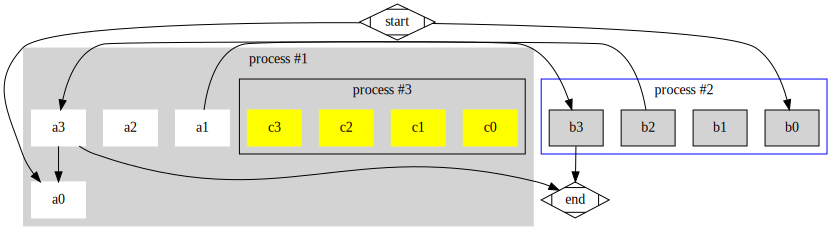

In [17]:
gc.graph

### json sample

In [ ]:
output_graph_dict = {
    'nodes': [
        {
            'attr': {
                'id': 'start',
                'shape': 'Mdiamond'
            }
        }
    ],
    'edges': [
        {
            'edge': ('start', 'a0'),
            'attr': {}
        }
    ],
    'subgraph': [
        {
            'name': 'cluster_0',
            'attr': {
                'style': 'filled',
                'color': 'lightgrey',
                'label': 'process #1'
            },
            'node_attr': {
                'style': 'filled',
                'color': 'white'
            },
            'nodes': [
                'a0',
                'a1',
                'a2',
                'a3'
            ],
            'edges': [('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')],
            'subgraph': [
                {
                    'name': 'cluster_2',
                    'attr': {
                        'style': 'filled',
                        'label': 'process #3'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'yellow'
                    },
                    'nodes': [
                        'c0',
                        'c1',
                        'c2',
                        'c3'
                    ],
                },
            ]
        }
    ]
}

### 1つのnode

In [84]:
class graph_creator(object):
    
    def __init__(self,
                 target_json,
                 svg_extension='svg',
                 dot='.',
                 file_path='./',
                 file_name='activate',
                 graph_type='Digraph',
                 engine='dot',
                 file_extension='svg'):
        import importlib
        import graphviz
        self.target_json = target_json
        self.graphviz = graphviz
        self.graph_type = getattr(graphviz, graph_type)
        self.file_extension = file_extension
        self.file_path = file_path
        self.file_name = file_name
        self.dot = dot
        self.engine = engine
        self.graph = self.graph_type(
            name='root',
            format=self.file_extension,
            engine=self.engine)
        self._create_graph()
        
    def _check_dictionary(self, dictionary, target_str):
        if dictionary.get(target_str) is None:
            return None
        else:
            return dictionary[target_str]
    def _check_attrs(self, attrs):
        attr_id = self._check_dictionary(attrs, 'id')
        attr_shape = self._check_dictionary(attrs, 'shape')
        attr_shape = attr_shape if attr_shape is not None else 'rect'
        attr_label = self._check_dictionary(attrs, 'label')
        attr_style = self._check_dictionary(attrs, 'style')
        attr_color = self._check_dictionary(attrs, 'color')
        return [attr_id, attr_shape, attr_label, attr_style, attr_color]
    
    def _create_subgraph(self, parent_graph, subgraphs):
        for idx in range(0, len(subgraphs)):
            subgraph = subgraphs[idx]
            child_subgraph = None
            if subgraph.get('subgraph') is not None:
                child_subgraph = subgraph['subgraph']

            name = subgraph['name']
            attrs = subgraph['attr']
            node_attr = subgraph['node_attr']
            nodes = subgraph['nodes']
            edges = subgraph['edges']
            print(name)
            print(attrs)
            print(node_attr)
            print(nodes)
            print(edges)

            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)

            [node_attr_id, node_attr_shape, node_attr_label, node_attr_style, node_attr_color] = self._check_attrs(node_attr)

            with parent_graph.subgraph(name=name) as sub:
                if child_subgraph is not None:
                    self._create_subgraph(sub, child_subgraph)
                for node_idx in range(0, len(nodes)):
                    # sub.node()
                    node = nodes[node_idx]
                    child_node_attr = node['attr']
                    [child_node_attr_id, child_node_attr_shape, child_node_attr_label, child_node_attr_style, child_node_attr_color] = self._check_attrs(child_node_attr)
                    sub.node(child_node_attr_id, id=child_node_attr_id, shape=child_node_attr_shape, label=child_node_attr_label, style=child_node_attr_style, color=child_node_attr_color)
                sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
                sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
                self._create_nodes(sub, nodes)
                self._create_edges(sub, edges)

    def _create_nodes(self, parent_graph, target_nodes):
        for idx in range(0, len(target_nodes)):
            target_node = target_nodes[idx]
            attrs = target_node['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_edges(self, parent_graph, target_edges):
        for idx in range(0, len(target_edges)):
            target_attr = target_edges[idx]
            edge = target_attr['edge']
            attrs = target_attr['attr']
            print(attrs)
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
            
    def _create_graph(self):
        self._create_subgraph(self.graph, self.target_json['subgraph'])
        # self._create_nodes(self.graph, self.target_json['nodes'])
        # self._create_edges(self.graph, self.target_json['edges'])

    def output_graph(self):
        output_file_path = self.file_path + self.file_name
        self.graph.render(output_file_path, view=False)


In [87]:
output_graph_dict = {
    'subgraph': [
        {
            'name': 'root',
            'attr': {},
            'node_attr': {},
            'nodes': [
                {
                    'attr': {
                        'id': 'start',
                        'shape': 'Mdiamond'
                    }
                },
                {
                    'attr': {
                        'id': 'end',
                        'shape': 'Mdiamond'
                    }
                },
            ],
            'edges': [
                {
                    'edge': ('start', 'a1'),
                    'attr': {'id': 'start-a1'}
                }, {
                    'edge': ('b3', 'end'),
                    'attr': {'id': 'b3-end'}
                }, {
                    'edge': ('a3', 'end'),
                    'attr': {'id': 'a3-end'}
                }, {
                    'edge': ('a1', 'b3'),
                    'attr': {'id': 'a1-b3'}
                }, {
                    'edge': ('b2', 'a3'),
                    'attr': {'id': 'b2-a3'}
                }, {
                    'edge': ('start', 'b0'),
                    'attr': {'id': 'start-b0'}
                },
            ],
            'subgraph': [
                {
                    'name': 'cluster_0',
                    'attr': {
                        'style': 'filled',
                        'color': 'lightgrey',
                        'label': 'process #1'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'white'
                    },
                    'nodes': [
                        {'attr': {'id': 'a0'}},
                        {'attr': {'id': 'a1'}},
                        {'attr': {'id': 'a2'}},
                        {'attr': {'id': 'a3'}},
                    ],
                    'edges': [
                        {
                            'edge': ('a0', 'a1'),
                            'attr': {'id': 'a0-a1'}
                        }, {
                            'edge': ('a1', 'a2'),
                            'attr': {'id': 'a1-a2'}
                        }, {
                            'edge': ('a2', 'a3'),
                            'attr': {'id': 'a2-a3'}
                        }, {
                            'edge': ('a3', 'a0'),
                            'attr': {'id': 'a3-a0'}
                        },
                    ],
                    'subgraph': [
                        {
                            'name': 'cluster_2',
                            'attr': {
                                'style': 'filled',
                                'label': 'process #3'
                            },
                            'node_attr': {
                                'style': 'filled',
                                'color': 'yellow'
                            },
                            'nodes': [
                                {'attr': {'id': 'c0'}},
                                {'attr': {'id': 'c1'}},
                                {'attr': {'id': 'c2'}},
                                {'attr': {'id': 'c3'}},
                            ],
                            'edges': [],
                        },
                    ]
                },
                {
                    'name': 'cluster_1',
                    'attr': {
                        'color': 'blue',
                        'label': 'process #2'
                    },
                    'node_attr': {
                        'style': 'filled'
                    },
                    'nodes': [
                        {'attr': {'id': 'b0'}},
                        {'attr': {'id': 'b1'}},
                        {'attr': {'id': 'b2'}},
                        {'attr': {'id': 'b3'}}
                    ],
                    'edges': [
                        {
                            'edge': ('b0', 'b1'),
                            'attr': {'id': 'b0-b1'}
                        }, {
                            'edge': ('b1', 'b2'),
                            'attr': {'id': 'b1-b2'}
                        }, {
                            'edge': ('b2', 'b3'),
                            'attr': {'id': 'b2-b3'}
                        }
                    ]
                }
            ],
        },
    ]
}

In [88]:
from graphviz import Digraph

file_path = './../data/create/'
file_name = 'activate-graph-20200229-8'

gc = graph_creator(output_graph_dict, file_path=file_path, file_name=file_name)
gc.output_graph()

root
{}
{}
[{'attr': {'id': 'start', 'shape': 'Mdiamond'}}, {'attr': {'id': 'end', 'shape': 'Mdiamond'}}]
[{'edge': ('start', 'a1'), 'attr': {'id': 'start-a1'}}, {'edge': ('b3', 'end'), 'attr': {'id': 'b3-end'}}, {'edge': ('a3', 'end'), 'attr': {'id': 'a3-end'}}, {'edge': ('a1', 'b3'), 'attr': {'id': 'a1-b3'}}, {'edge': ('b2', 'a3'), 'attr': {'id': 'b2-a3'}}, {'edge': ('start', 'b0'), 'attr': {'id': 'start-b0'}}]
cluster_0
{'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}
{'style': 'filled', 'color': 'white'}
[{'attr': {'id': 'a0'}}, {'attr': {'id': 'a1'}}, {'attr': {'id': 'a2'}}, {'attr': {'id': 'a3'}}]
[{'edge': ('a0', 'a1'), 'attr': {'id': 'a0-a1'}}, {'edge': ('a1', 'a2'), 'attr': {'id': 'a1-a2'}}, {'edge': ('a2', 'a3'), 'attr': {'id': 'a2-a3'}}, {'edge': ('a3', 'a0'), 'attr': {'id': 'a3-a0'}}]
cluster_2
{'style': 'filled', 'label': 'process #3'}
{'style': 'filled', 'color': 'yellow'}
[{'attr': {'id': 'c0'}}, {'attr': {'id': 'c1'}}, {'attr': {'id': 'c2'}}, {'attr': {'

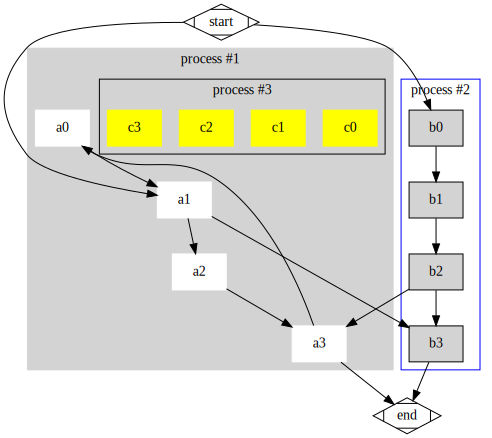

In [89]:
gc.graph